# Basic Statistics in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [32]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [33]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head(10)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [34]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [35]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

### Extract a Single Variable

We will start by analyzing a single variable from the dataset, **HP**.  
This variable tells us defines how much damage a Pokemon can withstand.  
Extract the variable and its associated data as a Pandas `DataFrame`.

In [41]:
hp = pd.DataFrame(pkmndata['HP'])
print("Data type : ", type(hp))
print("Data dims : ", hp.size)
hp_series=hp['HP']
hp_series #emphasize here that this is a series take from a dataframe

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  800


0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

---

### Uni-Variate Statistics

Check the Summary Statistics of Uni-Variate Series using `describe`.

In [42]:
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [43]:
hp_series.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

Check the Summary Statistics visually using a standard `boxplot`.

<AxesSubplot:>

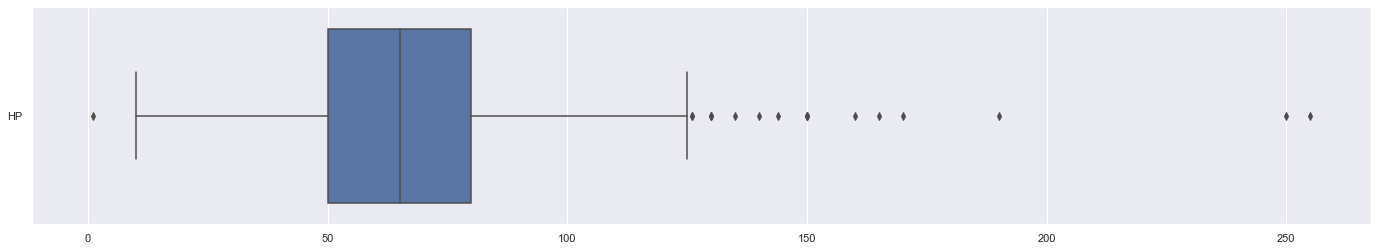

In [45]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
#sb.boxplot(x=hp_series, orient = "h")
sb.boxplot(data=hp, orient ="h")

Extend the summary to visualize the complete distribution of the Series.  
The first visualization is a simple Histogram with automatic bin sizes.

The second visualization is a simple Kernel Density Estimate (KDE).

<AxesSubplot:xlabel='HP', ylabel='Density'>

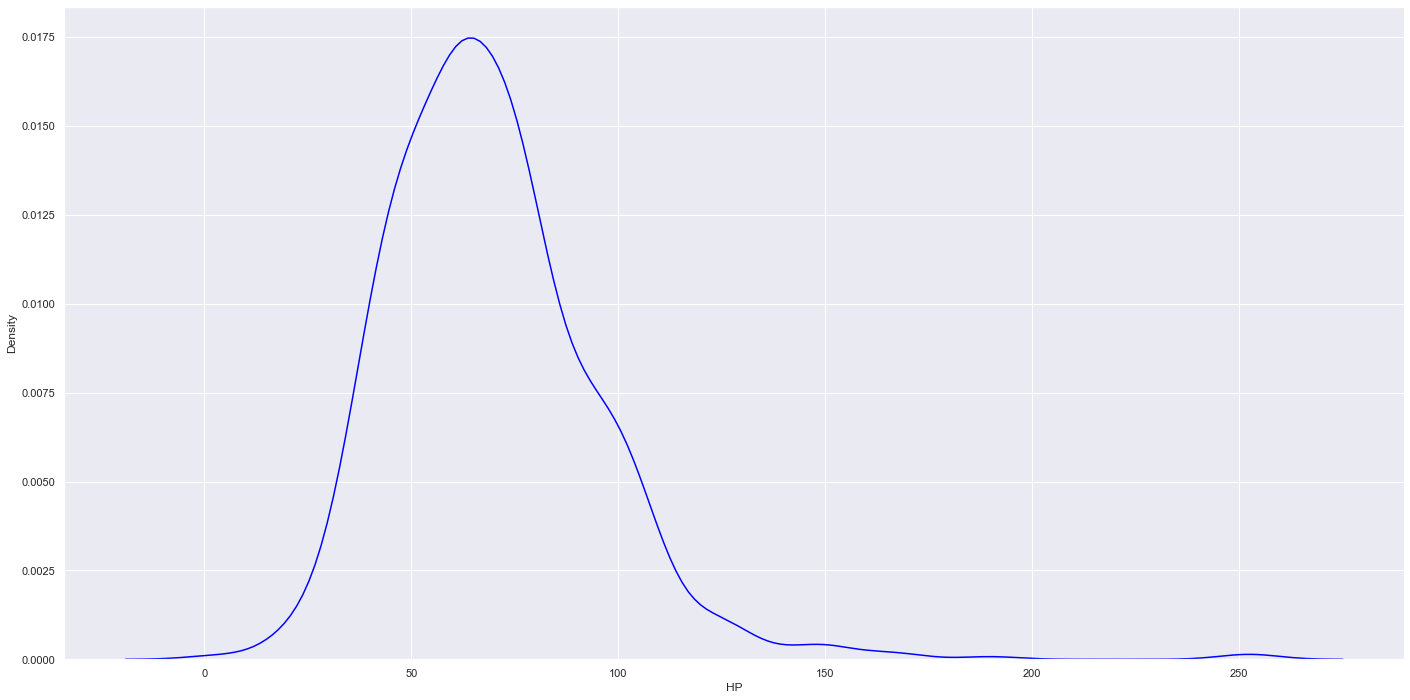

In [47]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
#sb.histplot(x=hp_series, color = "red", kde = True )
sb.kdeplot (data=HP, color = 'blue')

Finally, the **Violin Plot** combines boxplot with kernel density estimate.

Text(0.5, 0, 's')

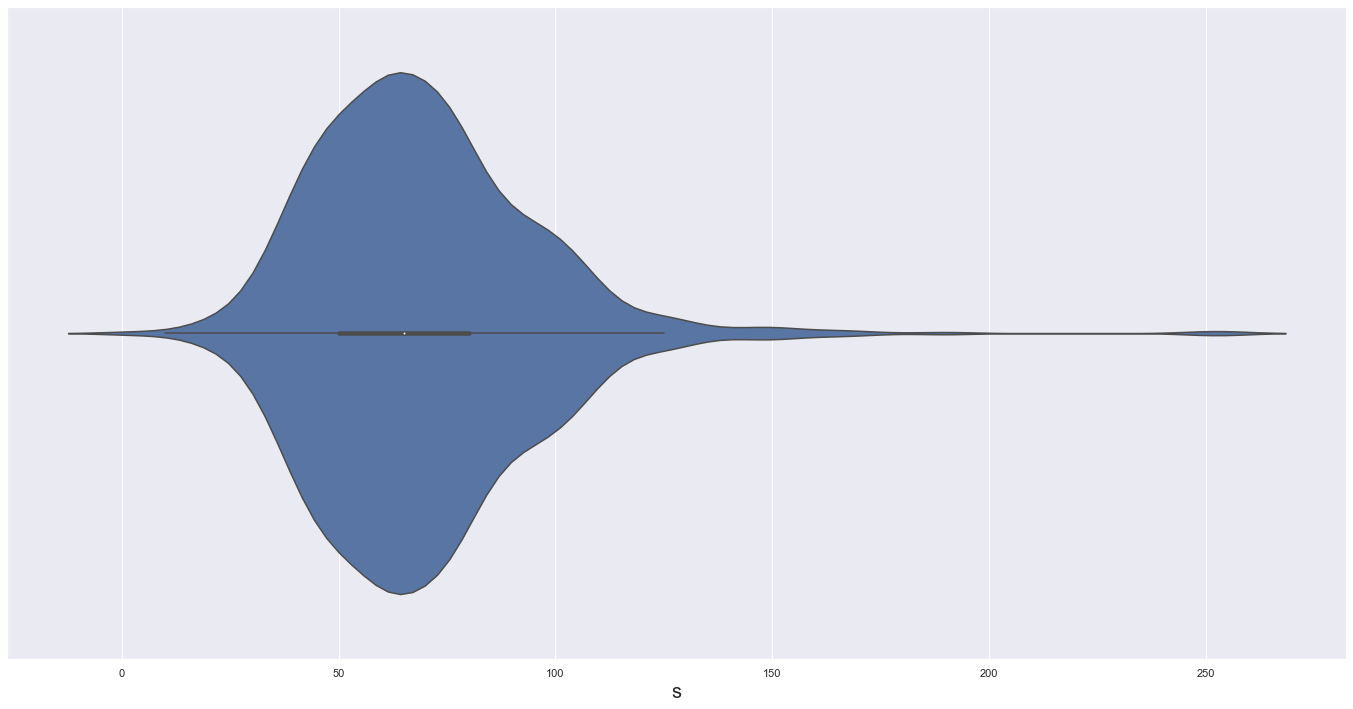

In [48]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.violinplot(x=hp_series)
axes.set_xlabel('s',fontsize=20)


---

### Extract Two Variables

Next, we will analyze two variables from the dataset, **HP** vs **Attack**.  
Extract the two variables and their associated data as a Pandas `DataFrame`.

In [49]:
hp = pd.DataFrame(pkmndata['HP'])
attack = pd.DataFrame(pkmndata['Attack'])

hp = pkmndata['HP']
attack = pkmndata['Attack']

---

### Bi-Variate Statistics

We can of course check the uni-variate Summary Statistics for each variable.

In [50]:
# Summary Statisttics for HP
hp.describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

In [51]:
# Summary Statisttics for Attack
attack.describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

And visualize the uni-variate Distributions of each variable independently.

<AxesSubplot:xlabel='Attack'>

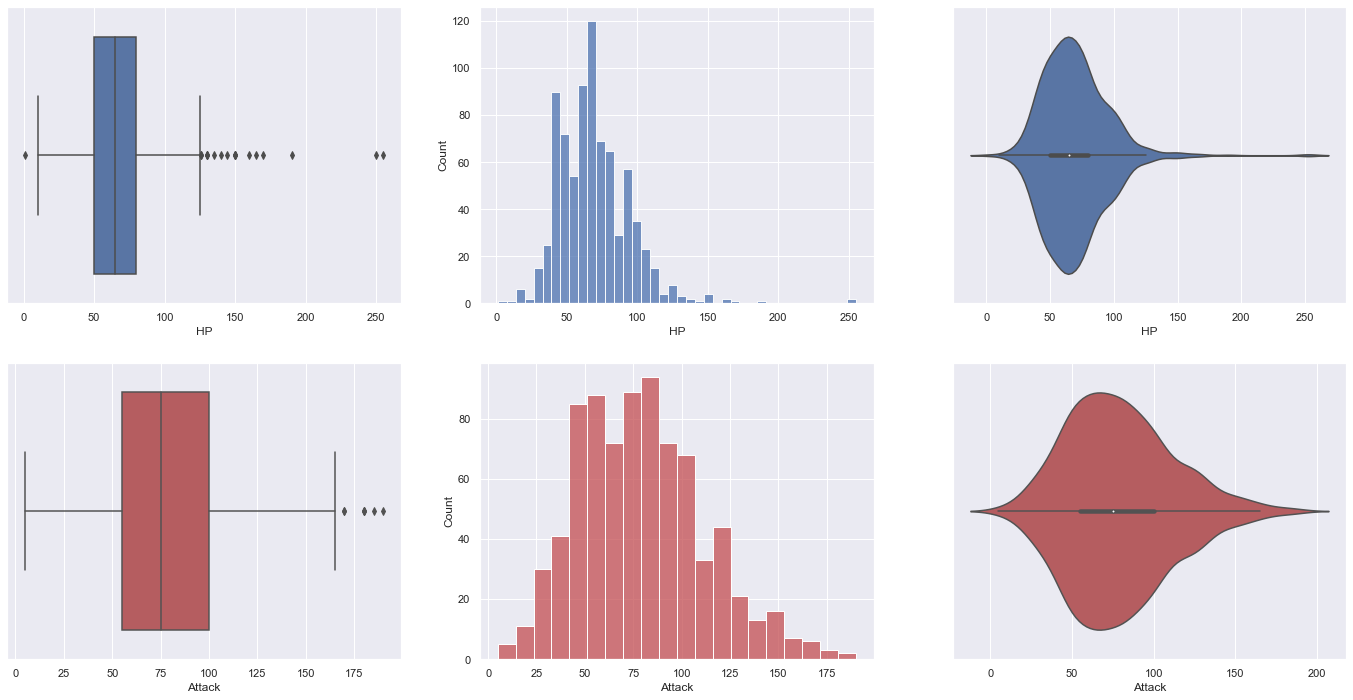

In [52]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(x=hp, orient = "h", ax = axes[0,0])
sb.histplot(x=hp, kde = False, ax = axes[0,1])
sb.violinplot(x=hp, ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(x=attack, orient = "h", ax = axes[1,0], color = 'r')
sb.histplot(x=attack, kde = False, ax = axes[1,1], color = 'r')
sb.violinplot(x=attack, ax = axes[1,2], color = 'r')

However, it will be more interesting to visualize them together in a `jointplot`.

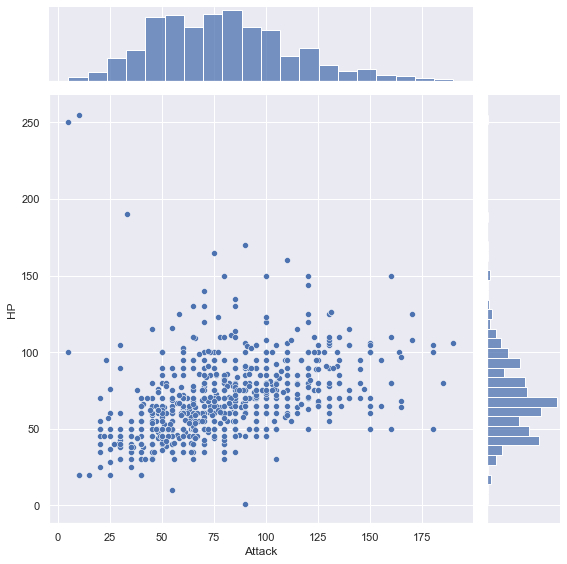

In [53]:
sb.jointplot(x = attack, y = hp, height = 8)

As it tells us something about the **Correlation** between the two variables.

In [54]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([attack, hp], axis = 1,join='inner')
print(jointDF)
# Calculate the correlation between the two columns/variables
corrmat = jointDF.corr()

     Attack  HP
0        49  45
1        62  60
2        82  80
3       100  80
4        52  39
..      ...  ..
795     100  50
796     160  50
797     110  80
798     160  80
799     110  80

[800 rows x 2 columns]


One may visualize the correlation matrix as a `heatmap` to gain a better insight.

<AxesSubplot:>

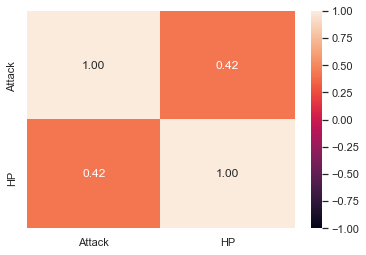

In [55]:
sb.heatmap(corrmat, vmin = -1, vmax = 1, annot = True, fmt=".2f")

---

### Multi-Variate Statistics

Similarly, we may analyze all numeric values in the original dataset.

In [56]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<AxesSubplot:>

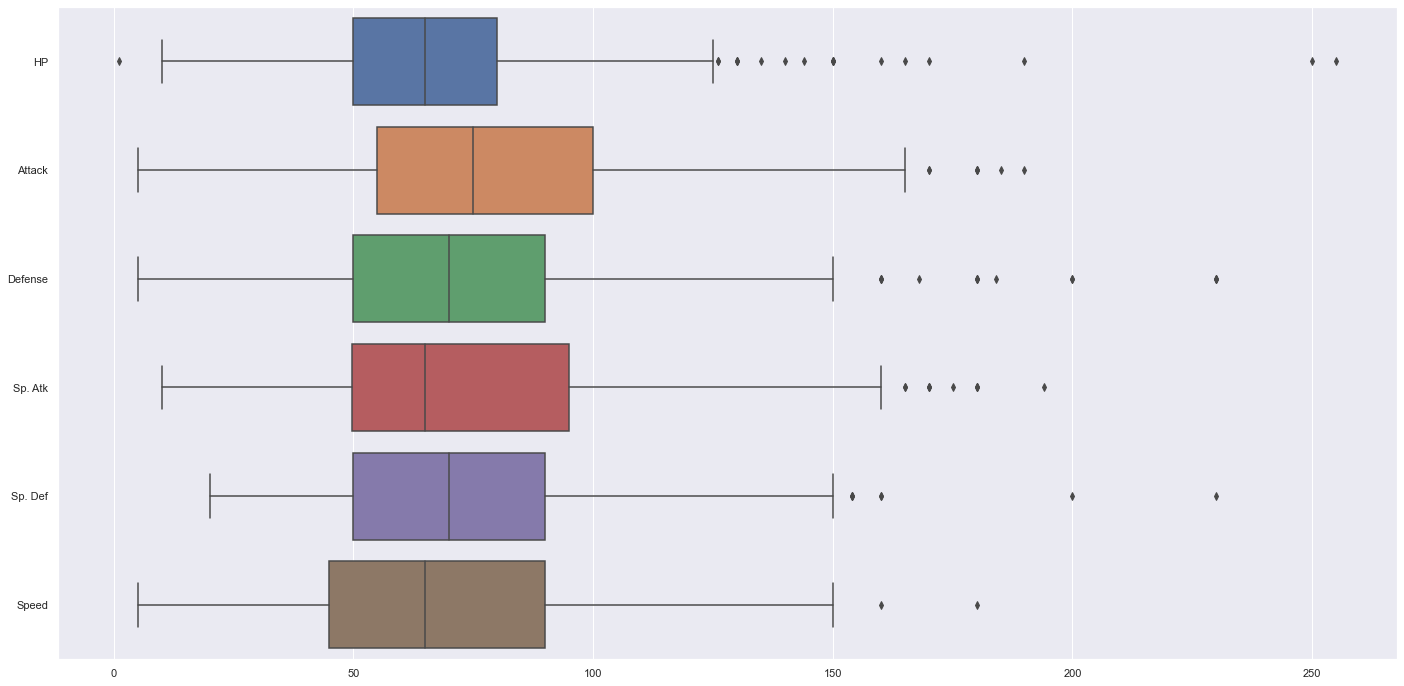

In [57]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = numDF, orient = "h")

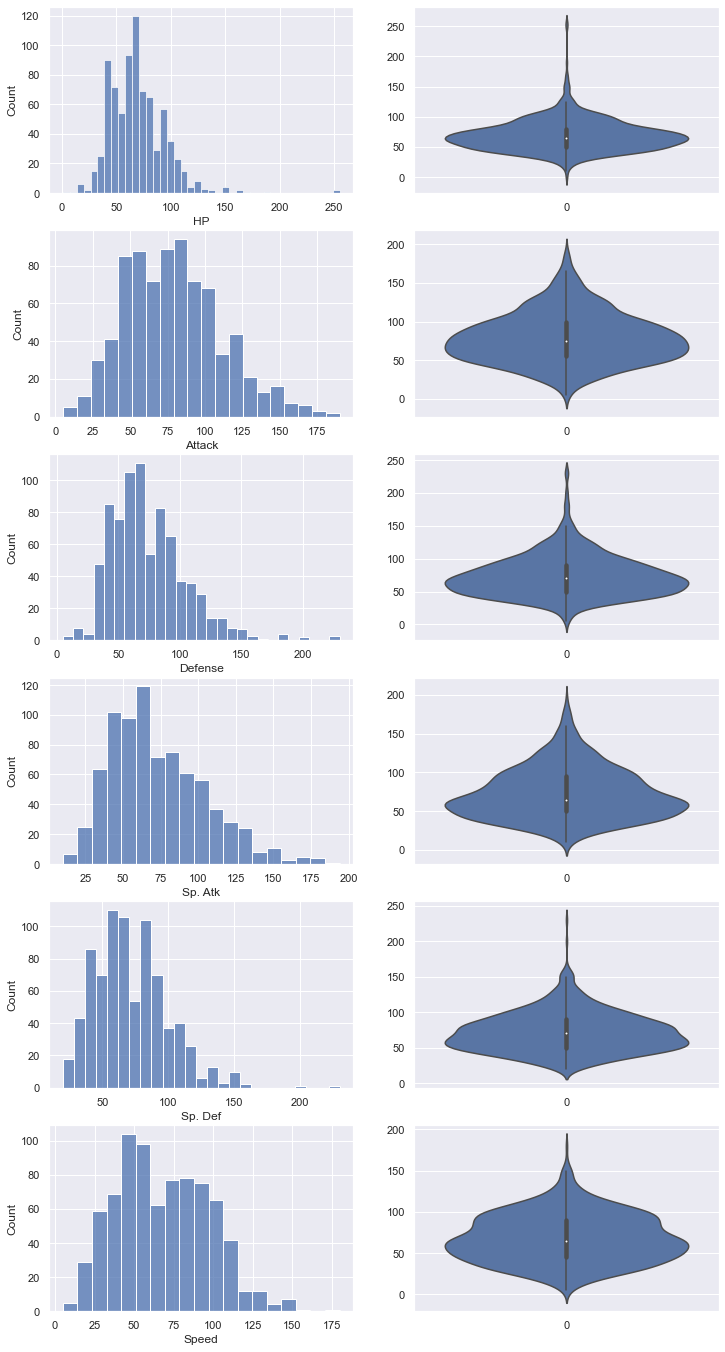

In [58]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 2, figsize=(12, 24))

count = 0
for var in numDF:
    sb.histplot(data =numDF[var], ax = axes[count,0])
    sb.violinplot(data = numDF[var], ax = axes[count,1])
    count += 1

In [59]:
# Calculate the complete  correlation matrix
numDF.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


<AxesSubplot:>

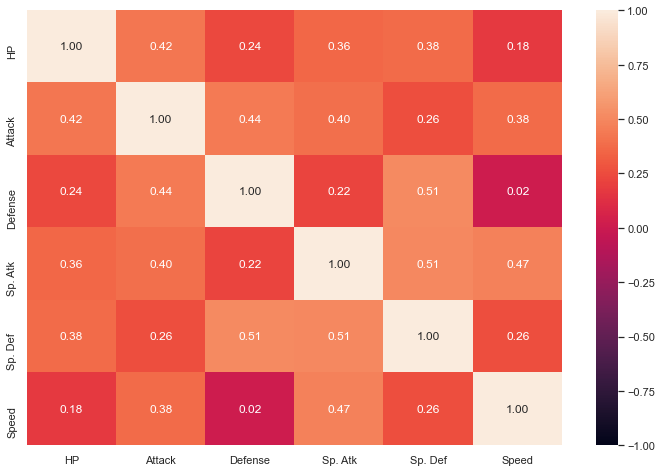

In [60]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

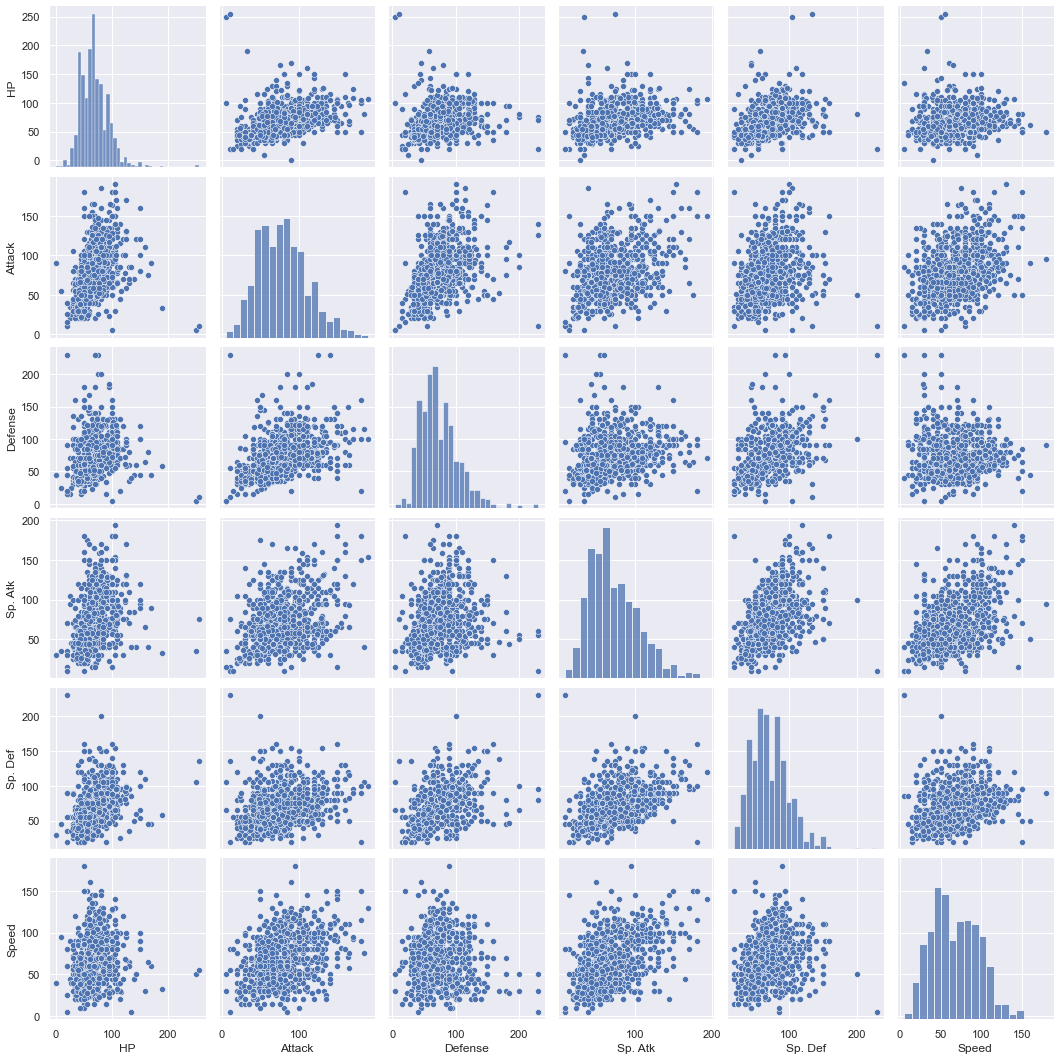

In [61]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

---

### Explore the Dataset

Exploring any dataset requires a solid understanding of the domain -- it is Pokemon, in our case.    
We understand the following basics regarding Pokemon, primarily from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon) and [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Generation).    

> **Generation** : There are seven generations of Pokemon as of 2018, with 721 till Generation VI (this dataset).   
> **Type** : Every Pokemon has a *primary* type, and some of them also have a *secondary* type -- dual-type ones.    
> **Legendary** : These Pokemons are rare, powerful, and really hard to catch -- there are 38 upto Generation VI.    

Way more trivia about Pokemon is available online -- but let's come back and retrieve more information from the data.

#### Generations of Pokemon in the Dataset
We can analyzse the generations of pokemon in the dataset using a factor plot

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


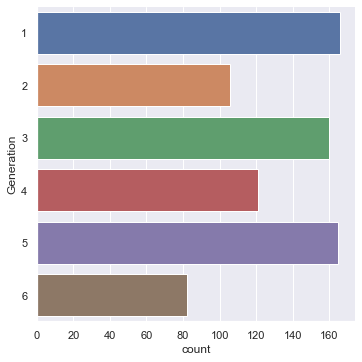

In [62]:
# Generations in the Dataset
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = 'count')
plt.show()

#### Types of Pokemon in the Dataset

![Types of Pokemon](PokemonTypes.png)

We understand that there are 18 Sun and Moon types for Pokemons, as shown in the image above, and some have both the Sun and Moon types.   

Number of Primary Types : 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


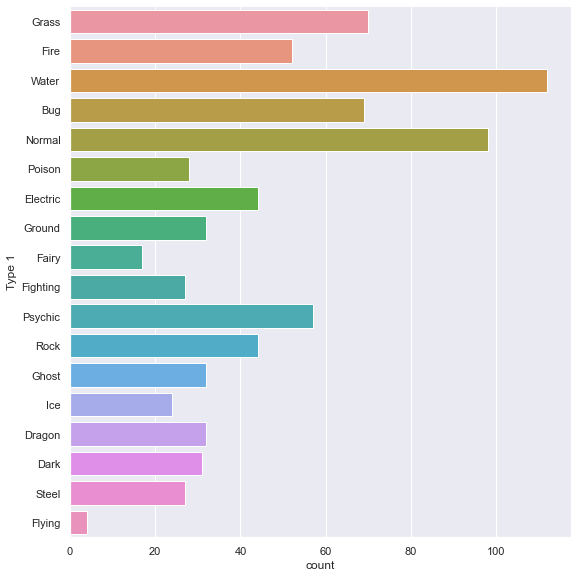

In [63]:
# Primary Types in the Dataset
print("Number of Primary Types :", len(pkmndata["Type 1"].unique()))

# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)
plt.show()

Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ice         14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


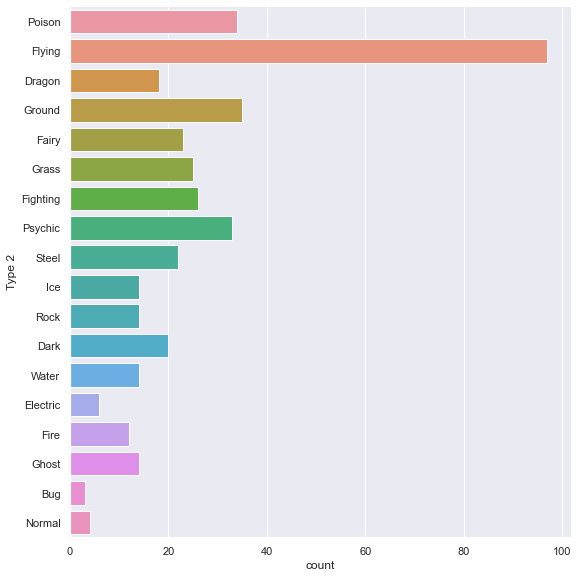

In [65]:
# Secondary Types in the Dataset
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)
plt.show()

In [66]:
# Pokemons with a Single Type -- I
singletype_data = pkmndata[pkmndata["Type 2"].isnull()]
print("Pokemons with just Type 1 :", len(singletype_data))
singletype_data.head()

Pokemons with just Type 1 : 386


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [67]:
# Pokemons with Dual Types -- I and II
dualtype_data = pkmndata[pkmndata["Type 2"].isnull() == False]
print("Pokemons with Types 1 and 2 :", len(dualtype_data))
dualtype_data.head()

Pokemons with Types 1 and 2 : 414


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


#### Types of Pokemon over Generations

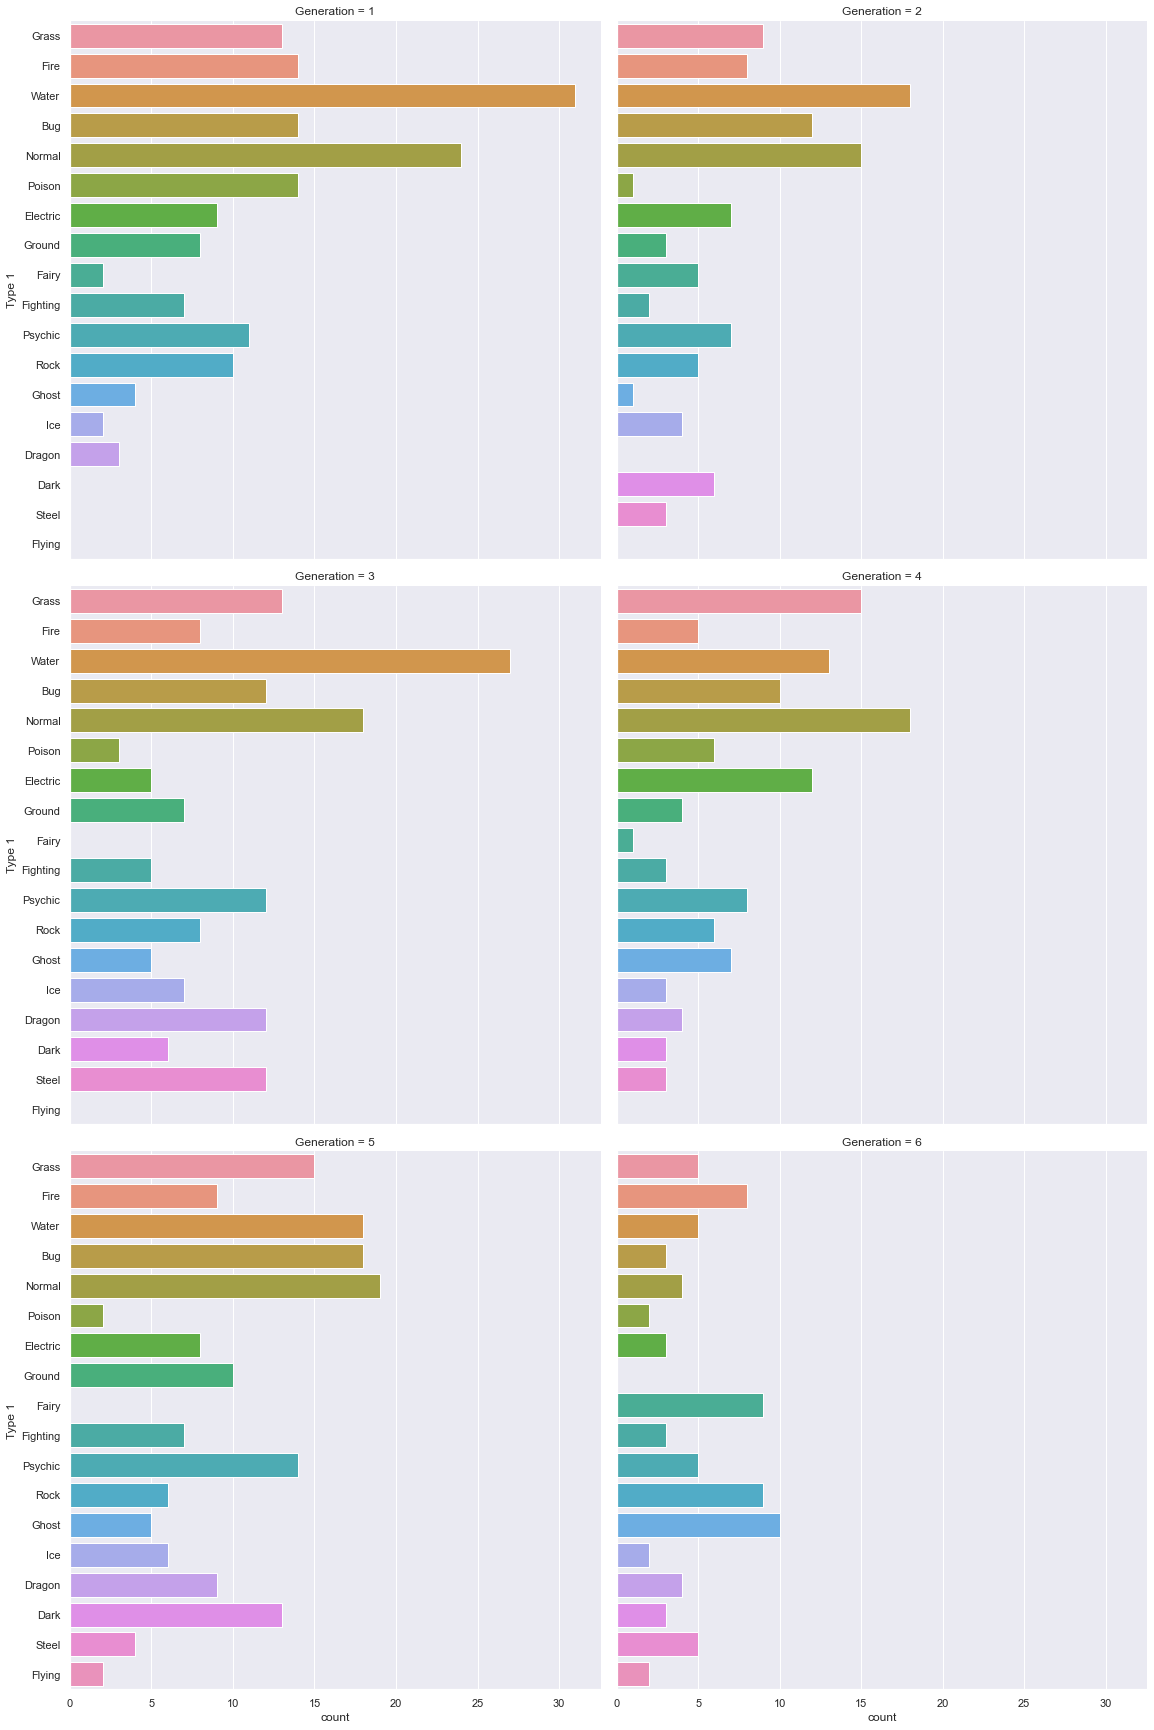

In [68]:
# Primary Type over Generations
sb.catplot(y = 'Type 1', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)
plt.show()

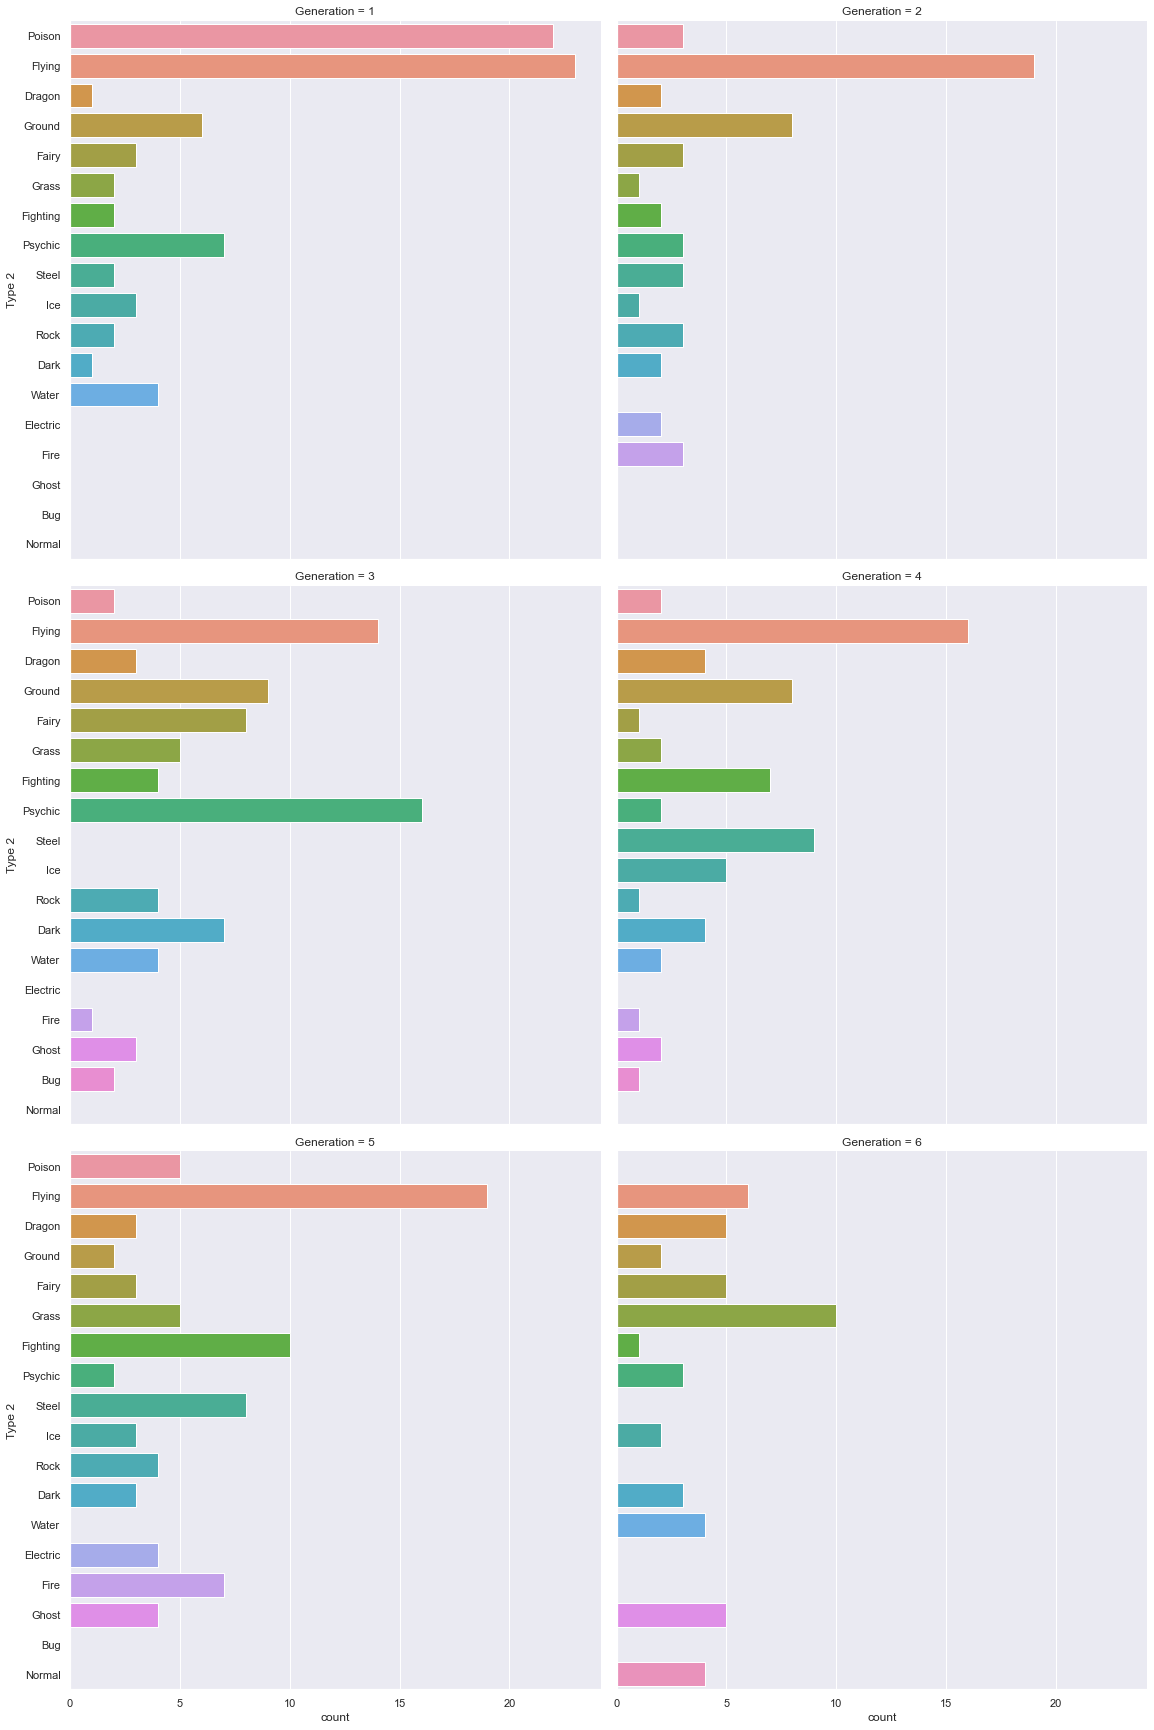

In [69]:
# Secondary Type over Generations
sb.catplot(y = 'Type 2', data = pkmndata, col = 'Generation', kind = 'count', col_wrap = 2, height = 8)
plt.show()